# Data Understanding

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import dataframe (without outliers)
df = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared/df_prep.xlsx", index_col="Unnamed: 0").sort_values("emotion")

In [ ]:
df_info = df.loc[:, "vocal_channel":"frame_width"]
df_data = df.loc[:, "length_ms":"skew"]

In [ ]:
cols_cat = ["vocal_channel", "emotional_intensity", "sex"] 
cols_data = ["intensity", "zero_crossings_sum", "max", "min", "skew", "std", "kur", "length_ms"]

In [ ]:
df.groupby("emotion")["intensity"].mean()

emotion
angry       -29.372847
calm        -44.075313
disgust     -41.053278
fearful     -34.142171
happy       -34.149587
neutral     -42.185377
sad         -41.464053
surprised   -38.615536
Name: intensity, dtype: float64

intensity


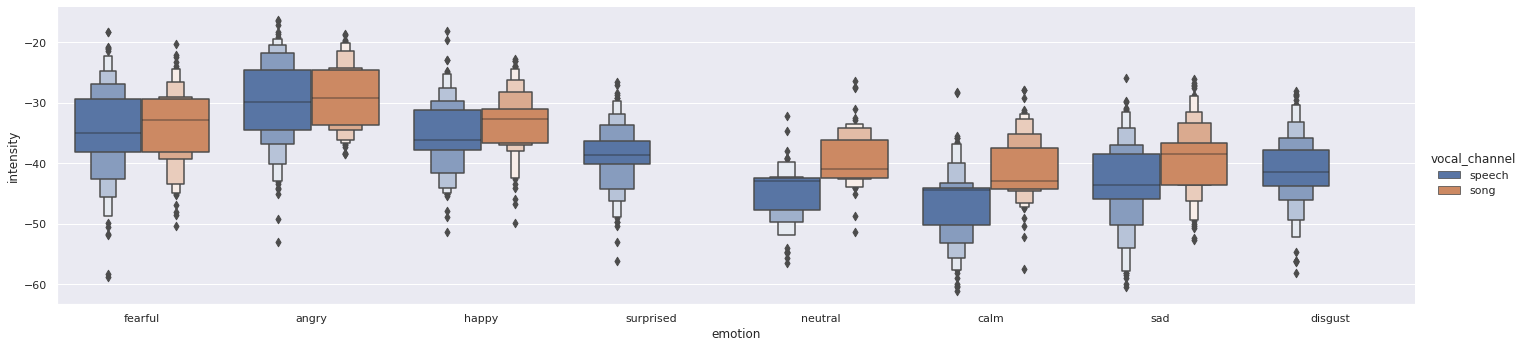

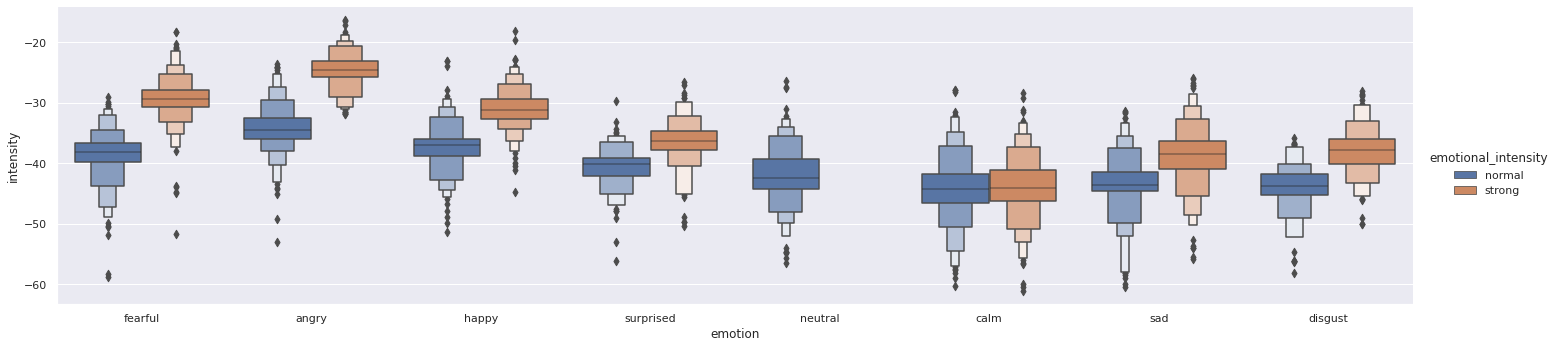

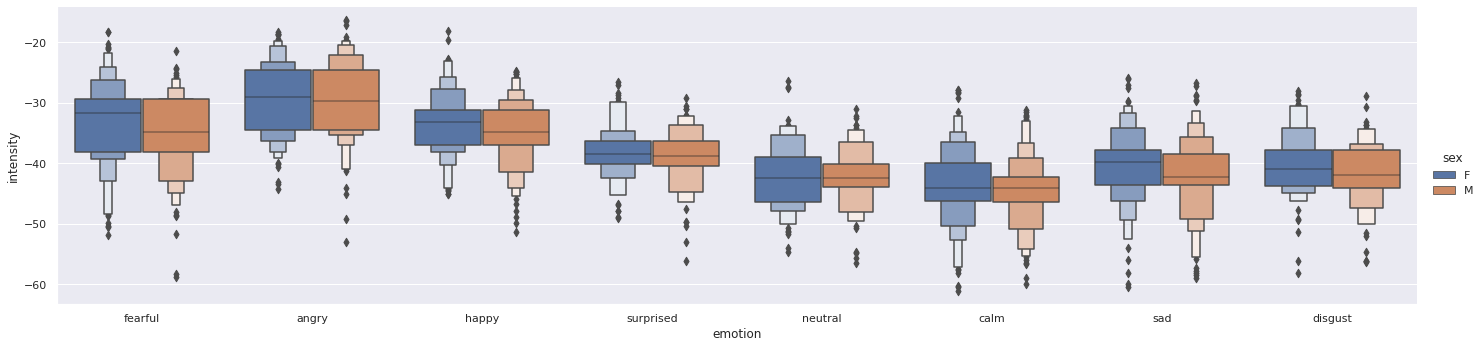

zero_crossings_sum


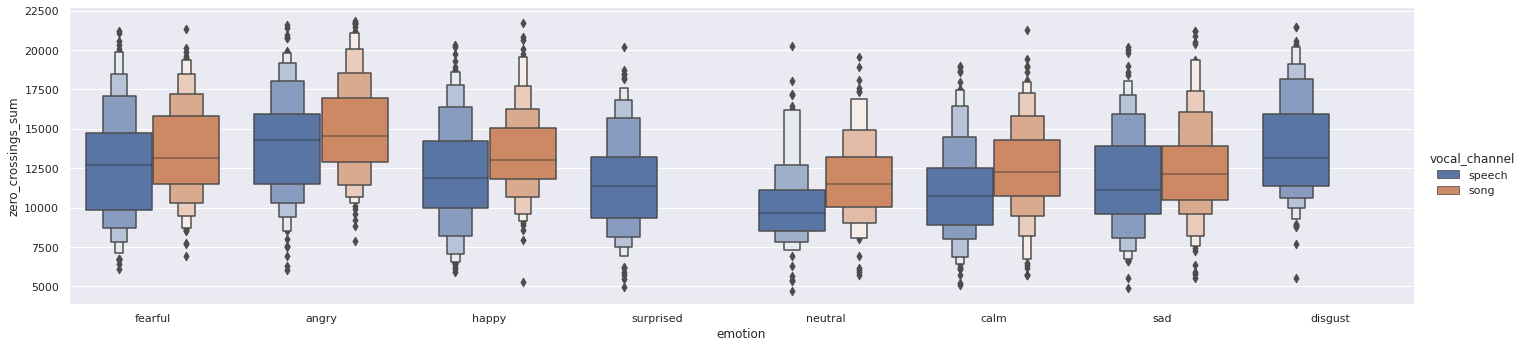

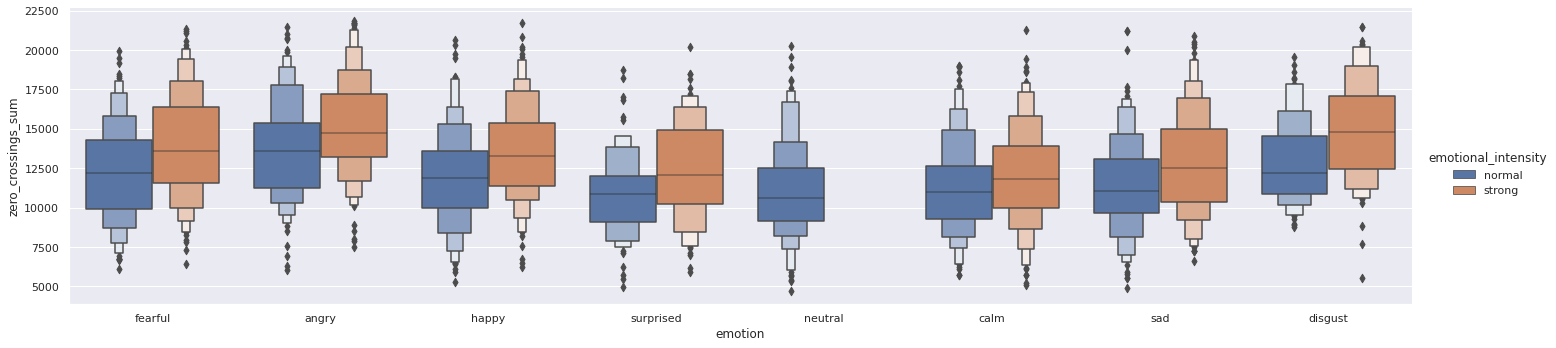

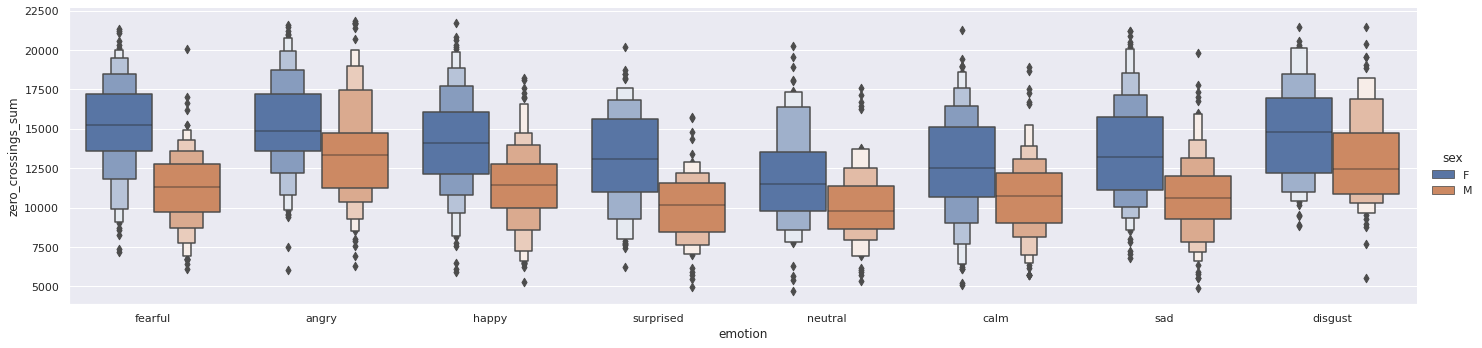

max


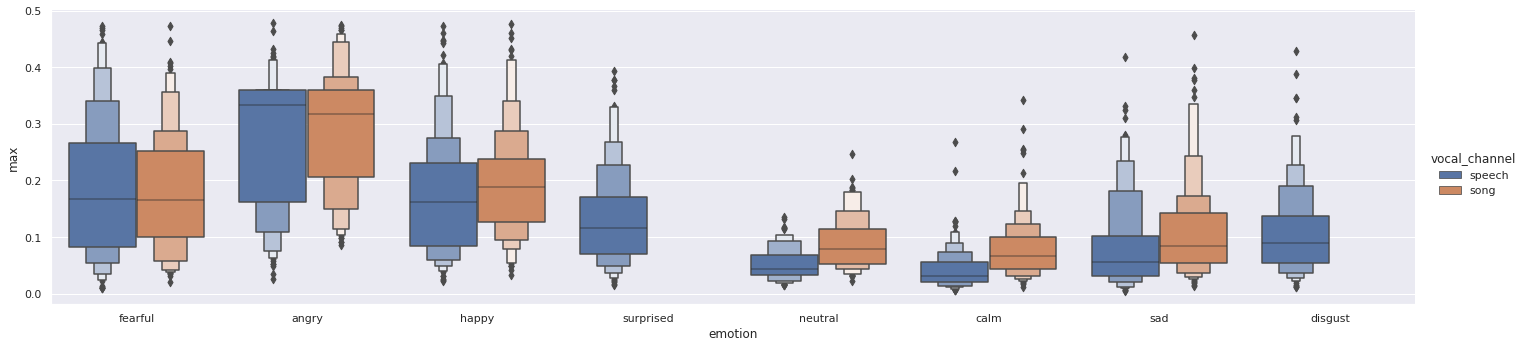

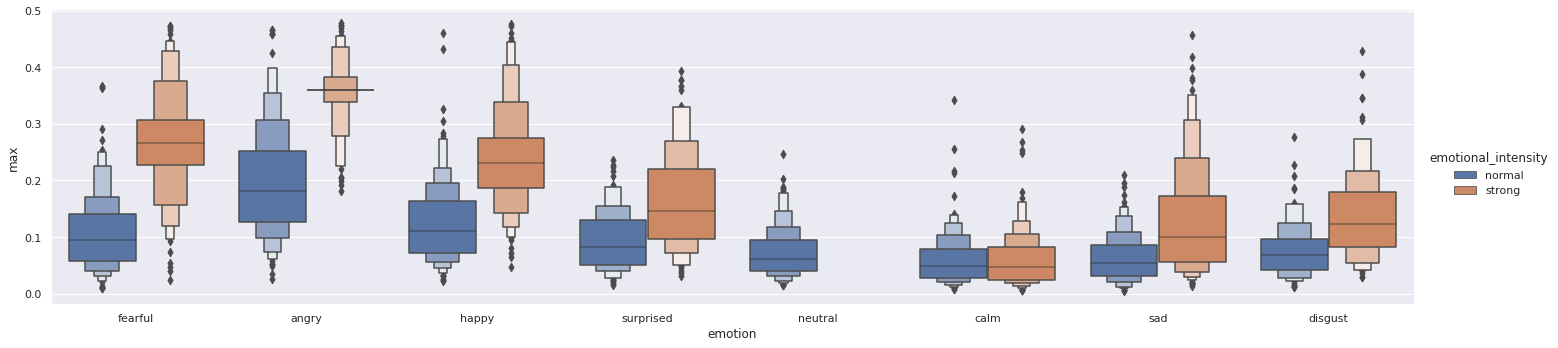

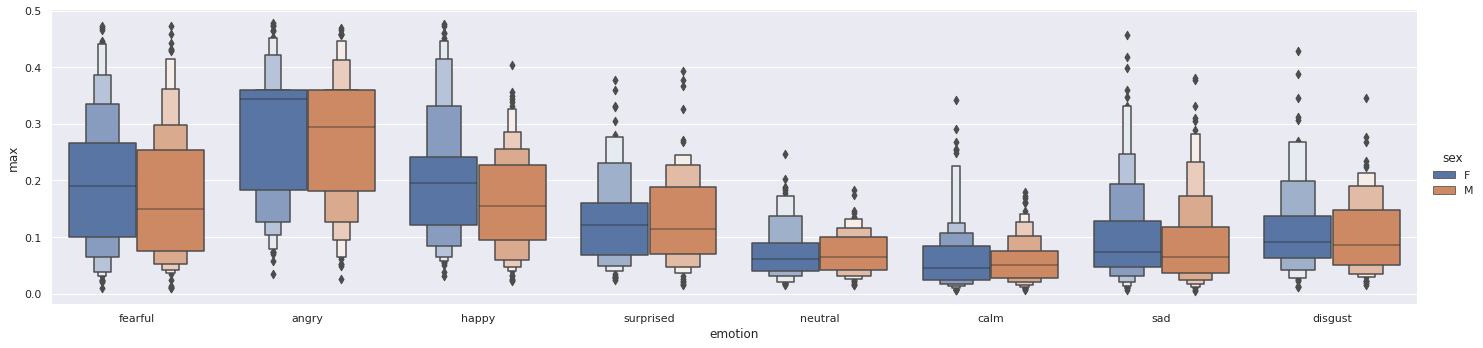

min


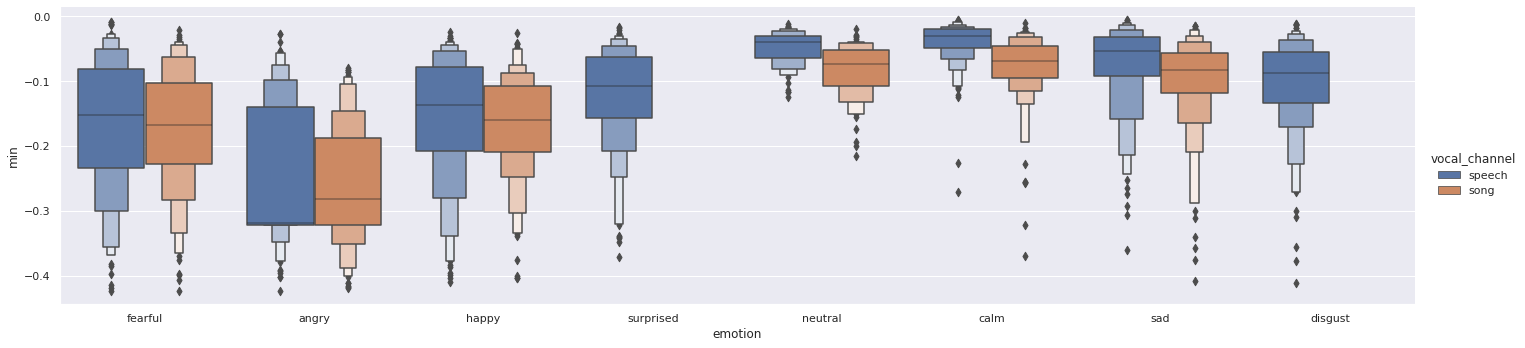

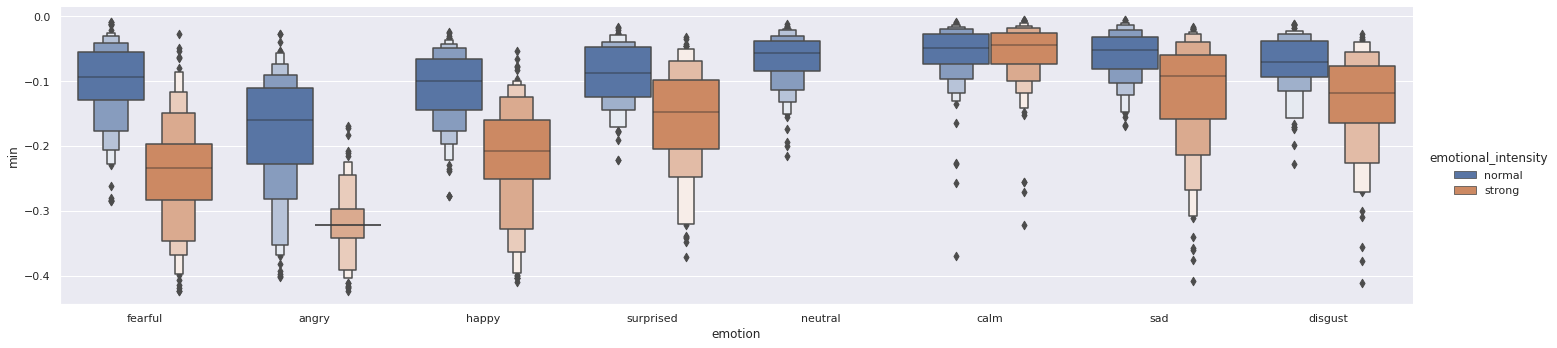

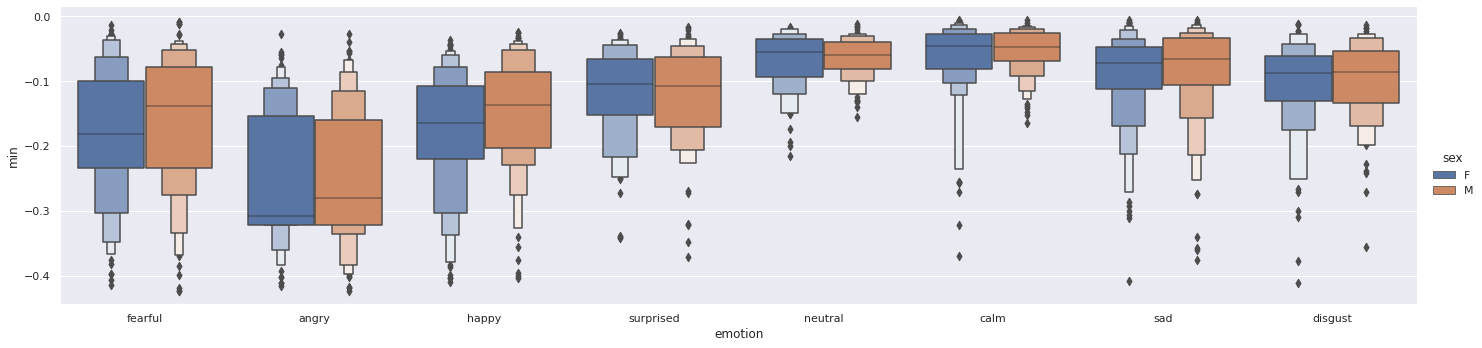

skew


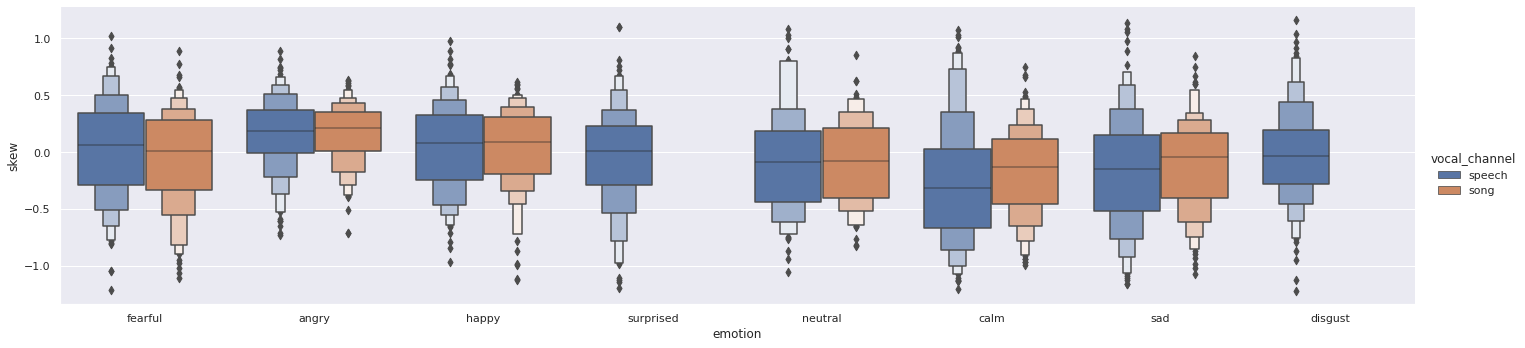

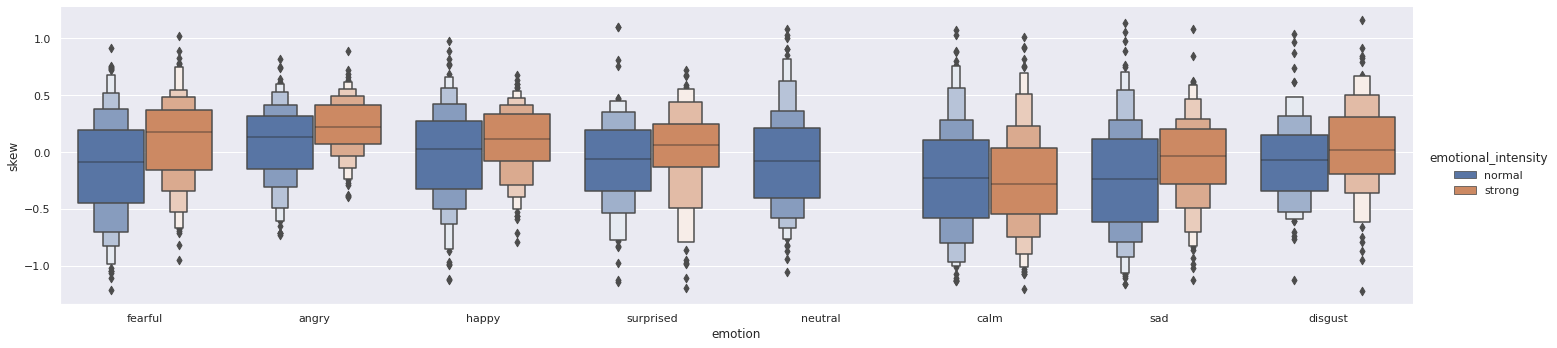

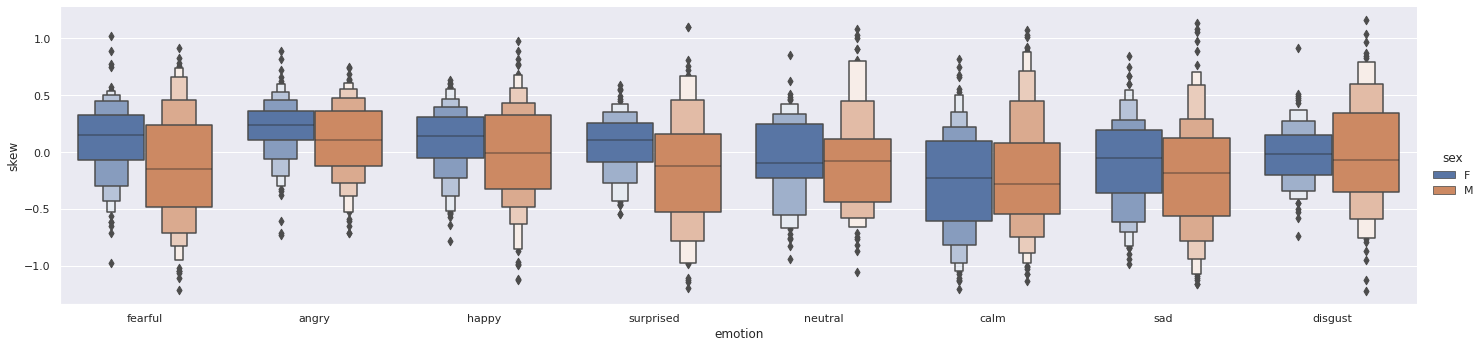

std


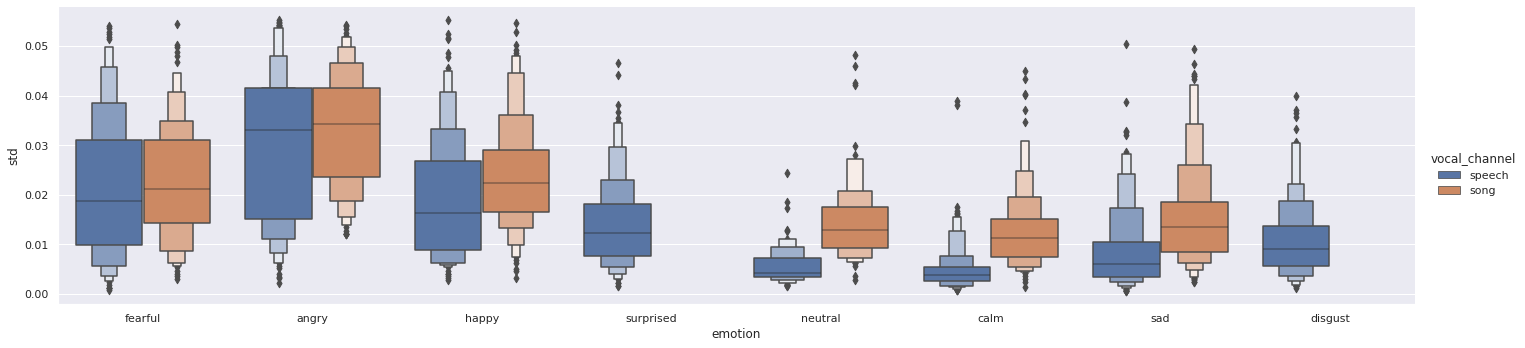

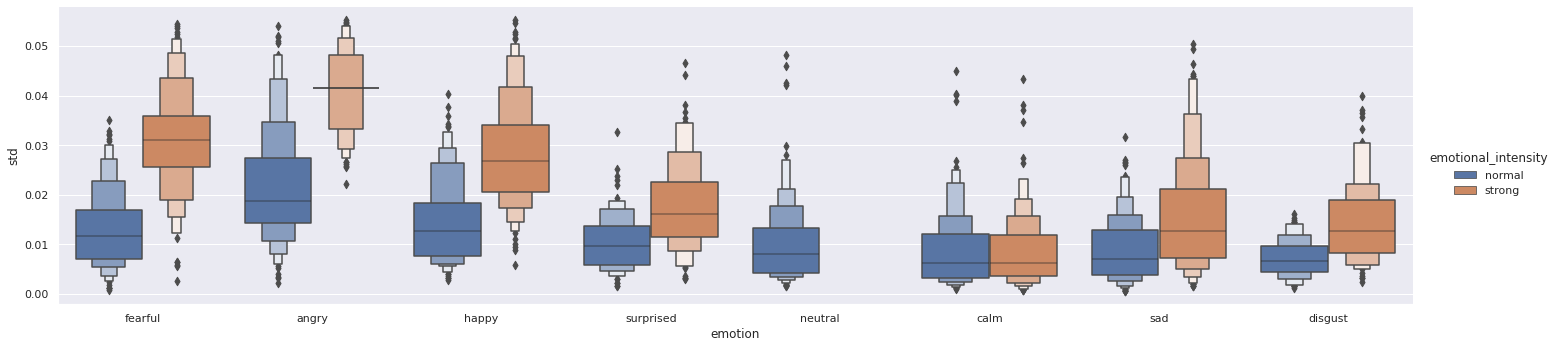

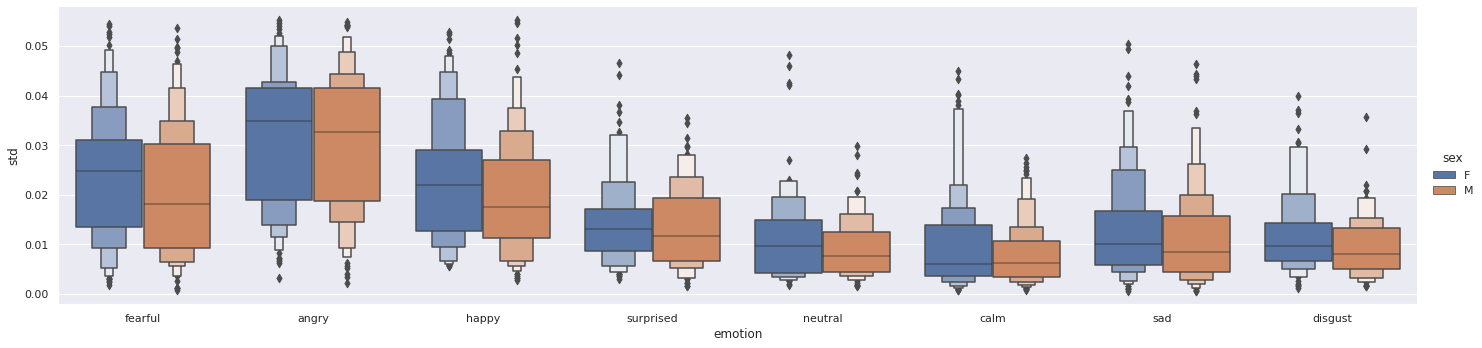

kur


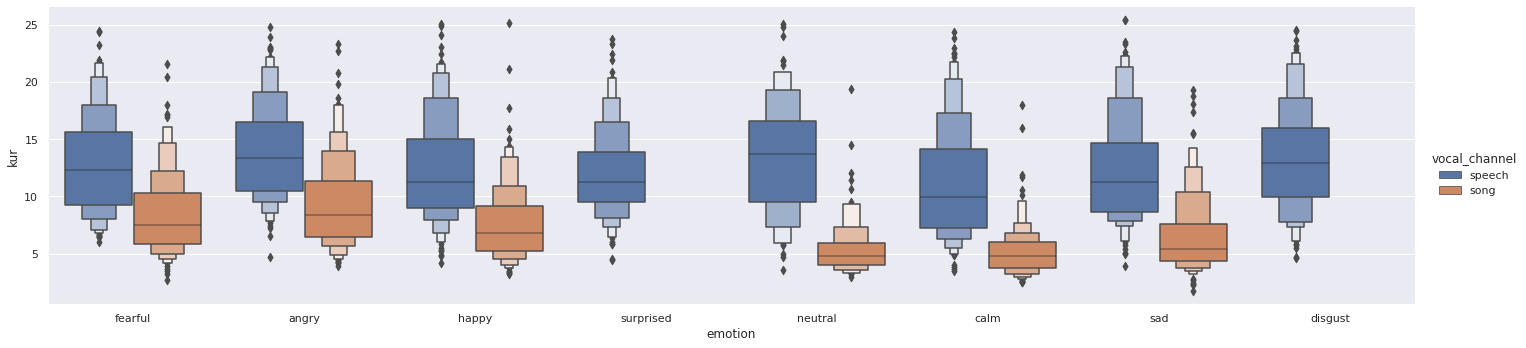

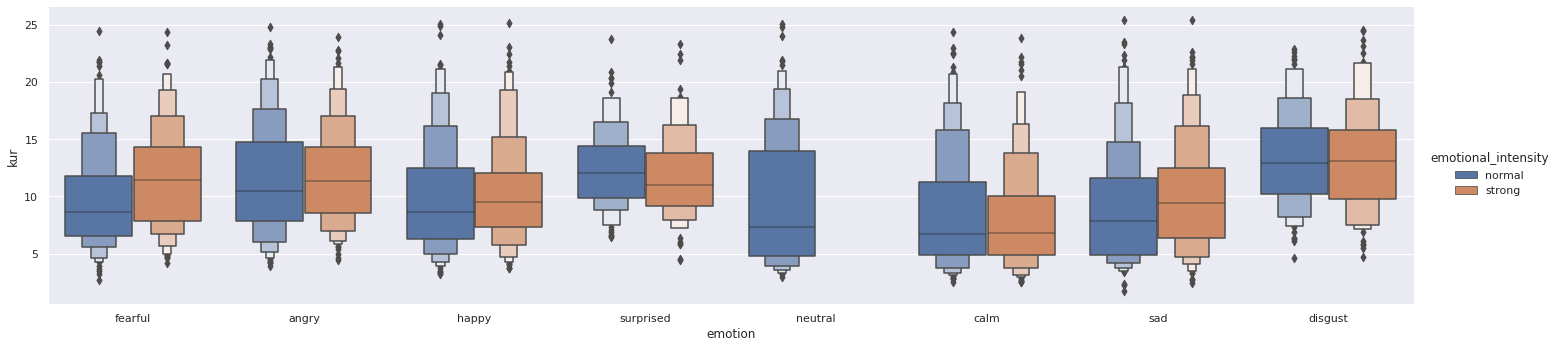

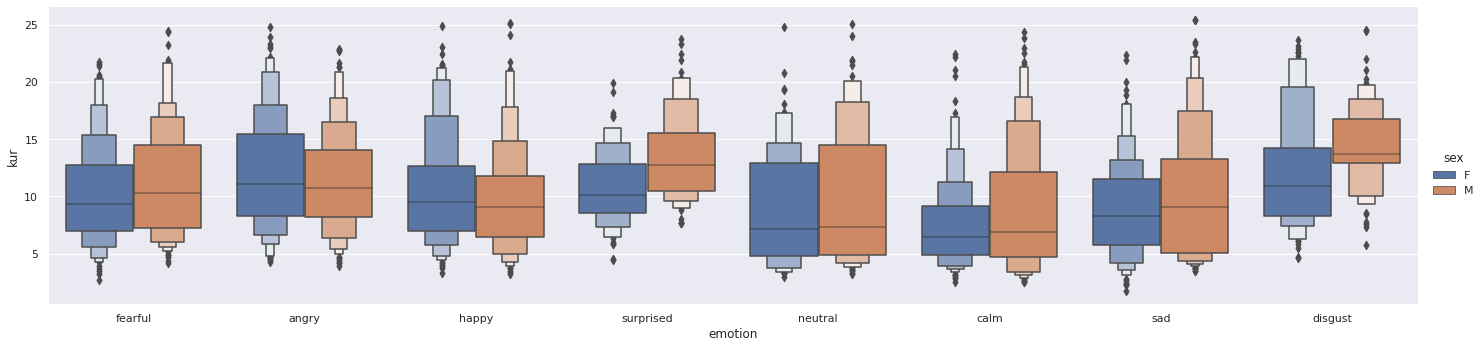

length_ms


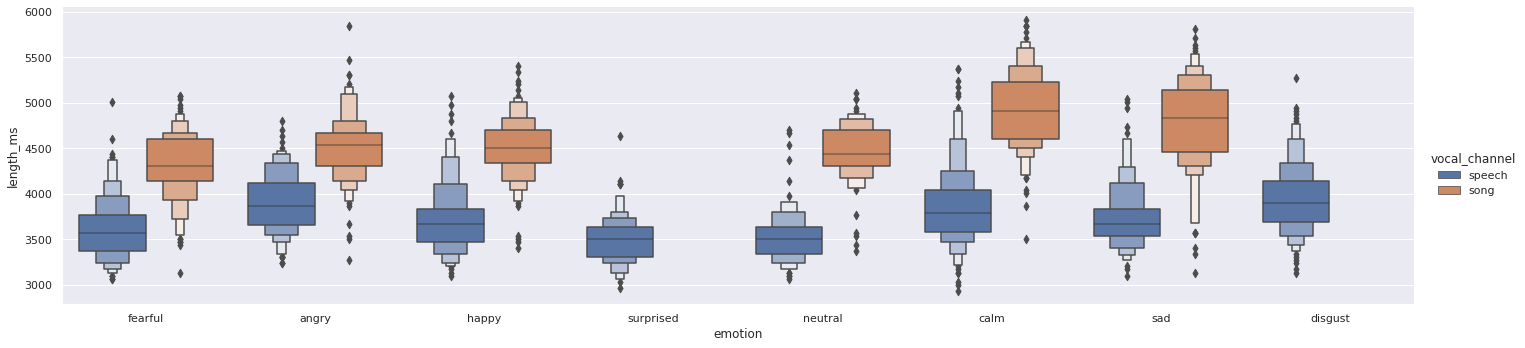

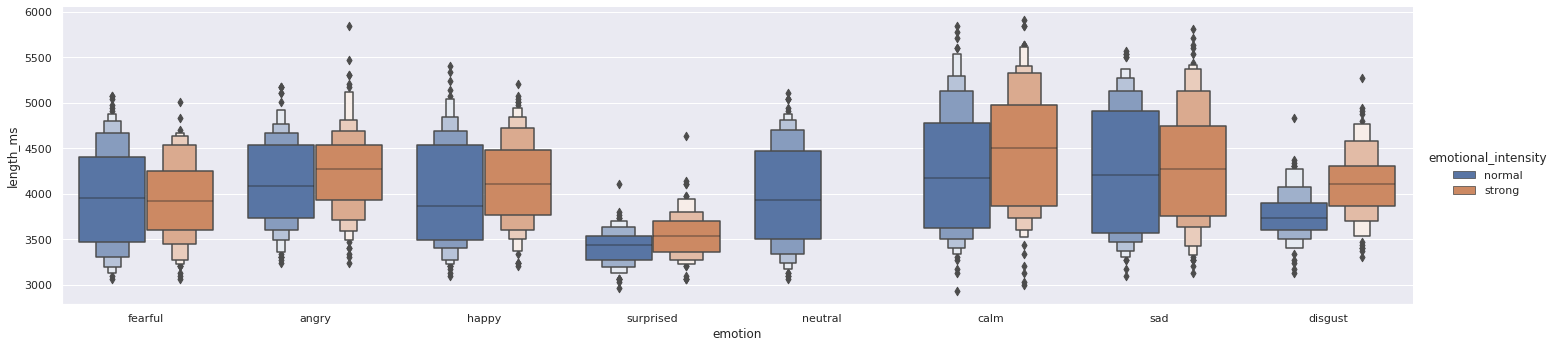

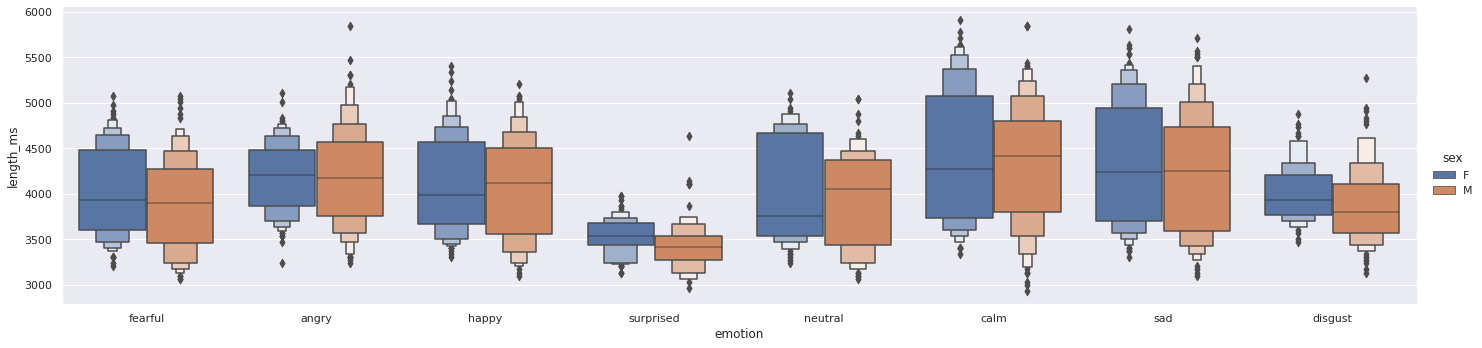

In [ ]:
sns.set_theme()
for col_data in cols_data:
  print(col_data)
  for col_cat in cols_cat:
    sns.catplot(
      data=df, x="emotion", y=col_data, hue=col_cat,
      kind="boxen", aspect=4
    )
    plt.show()

intensity


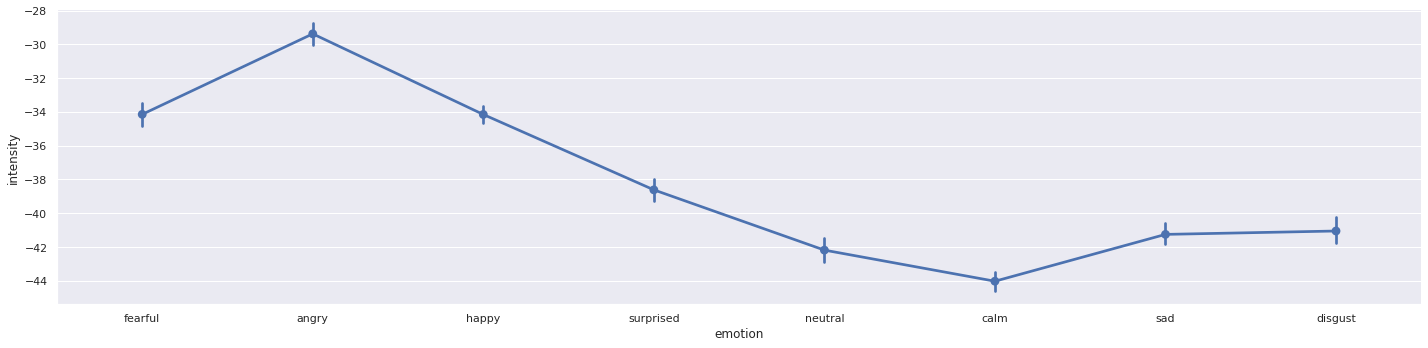

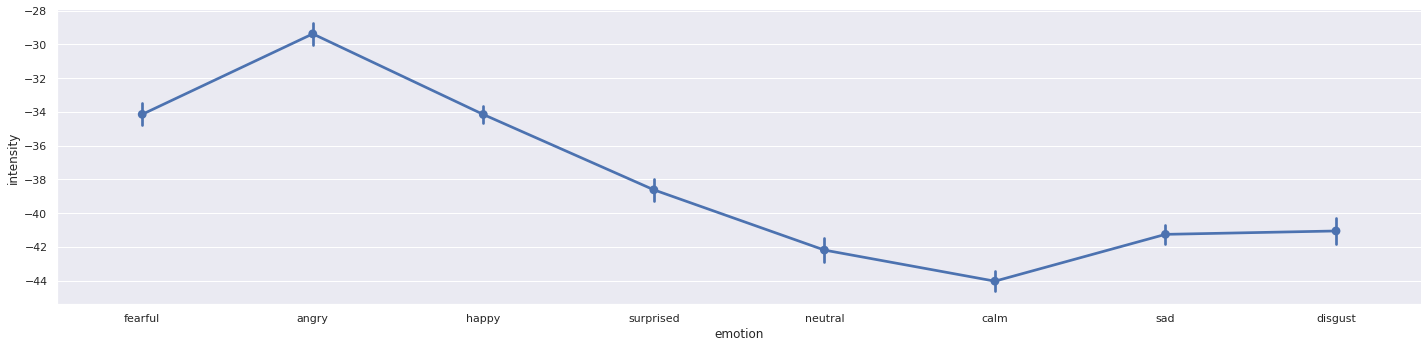

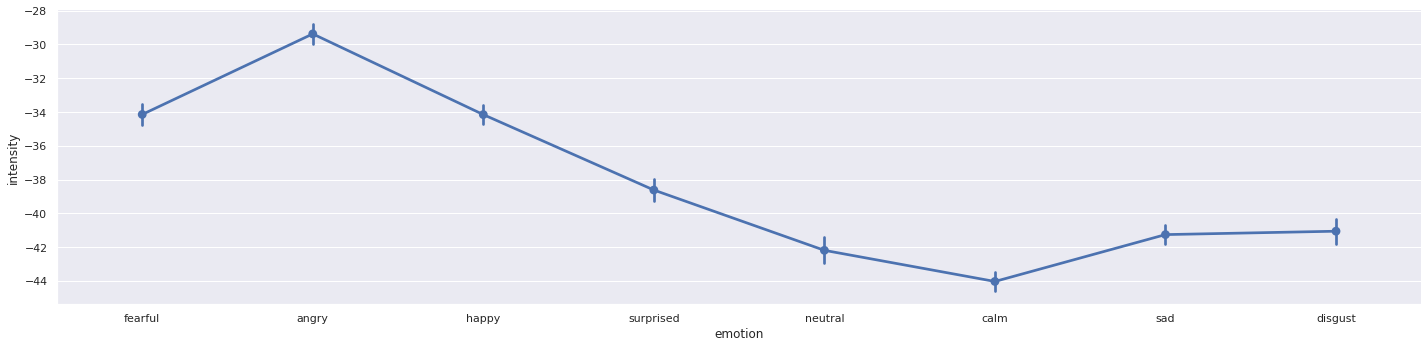

zero_crossings_sum


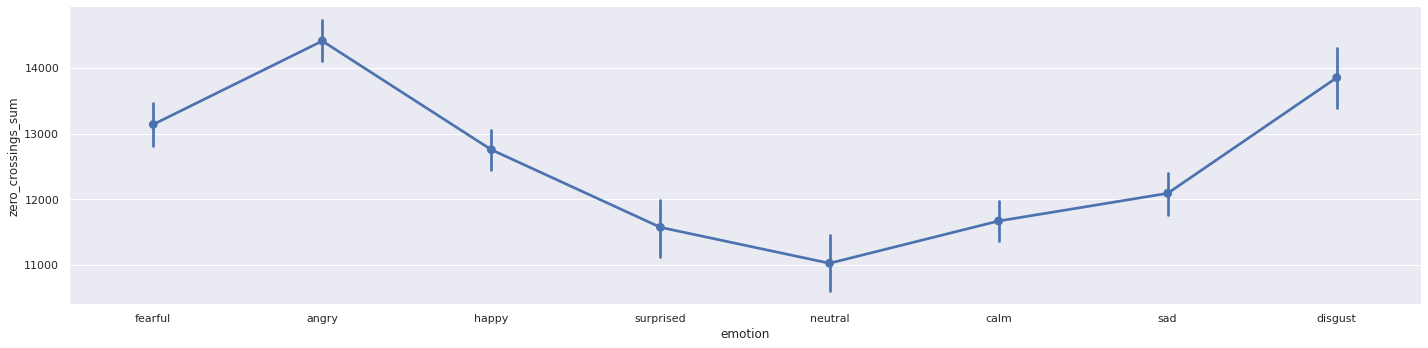

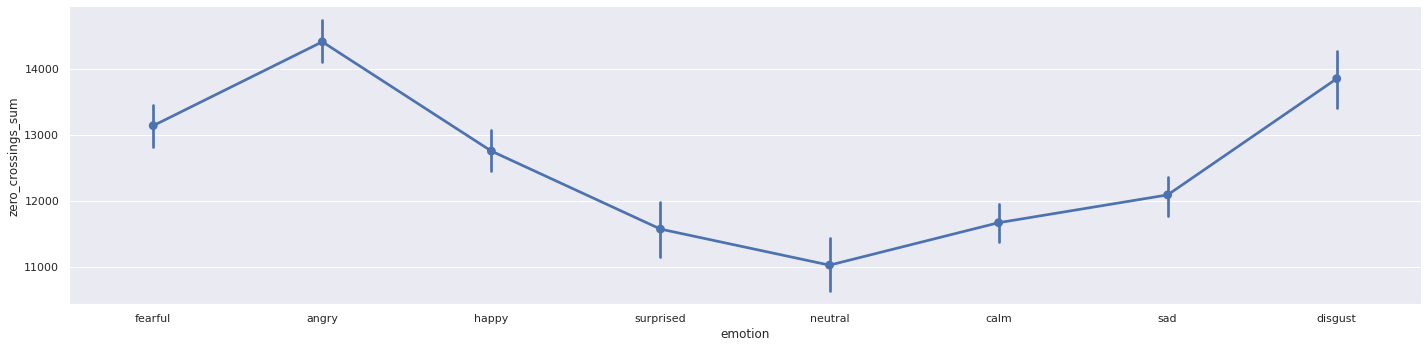

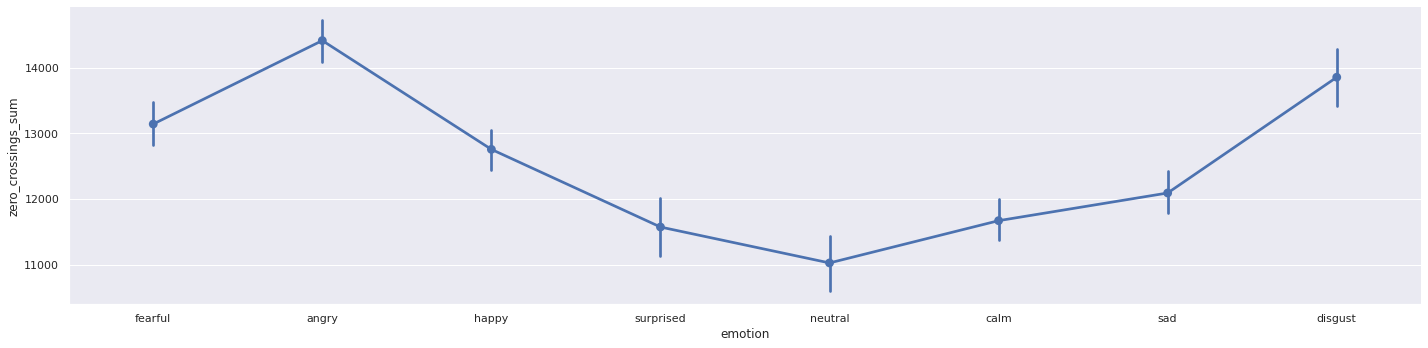

max


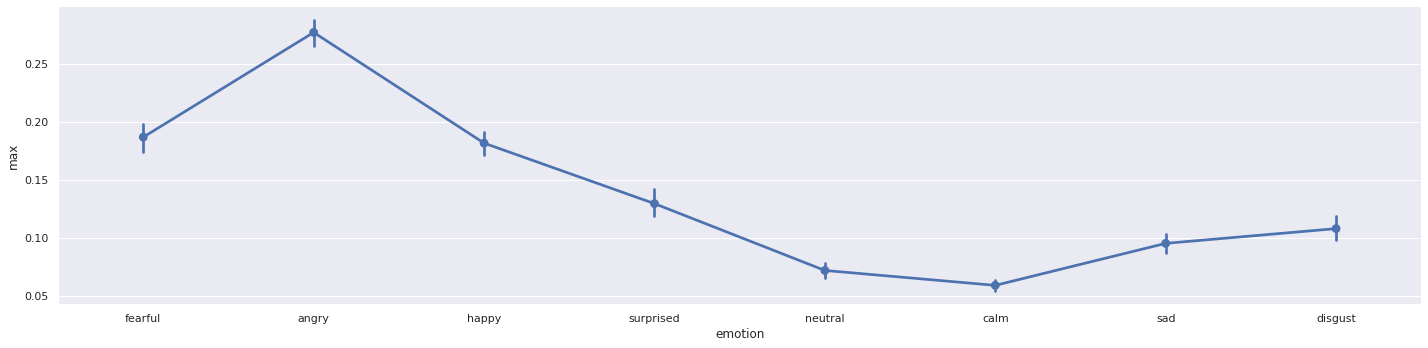

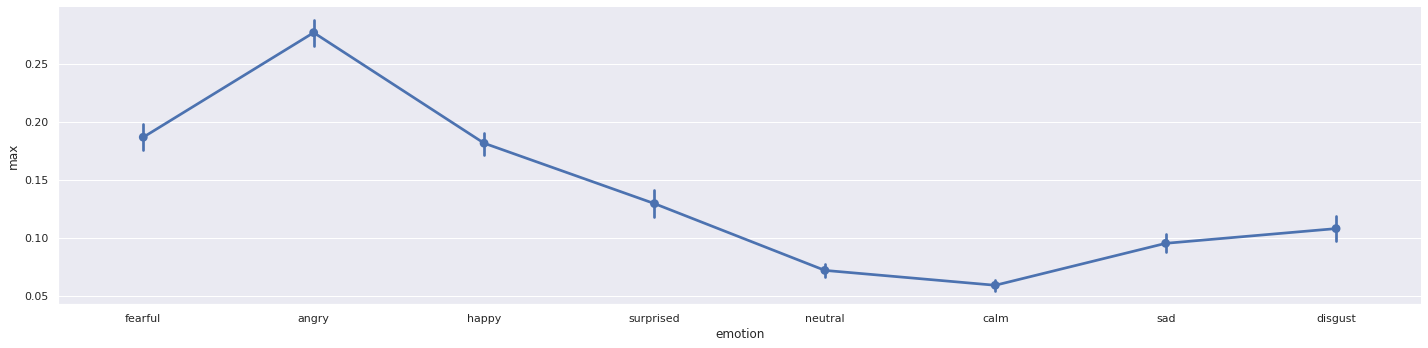

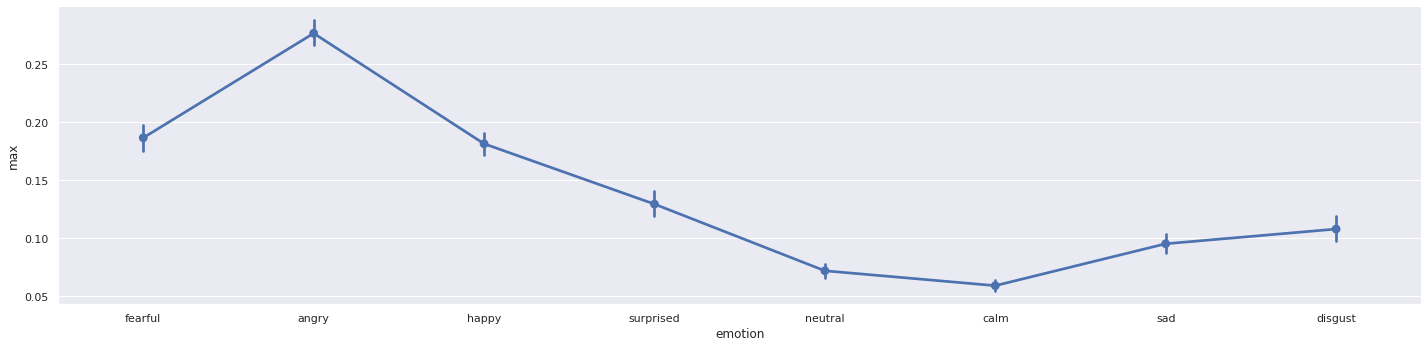

min


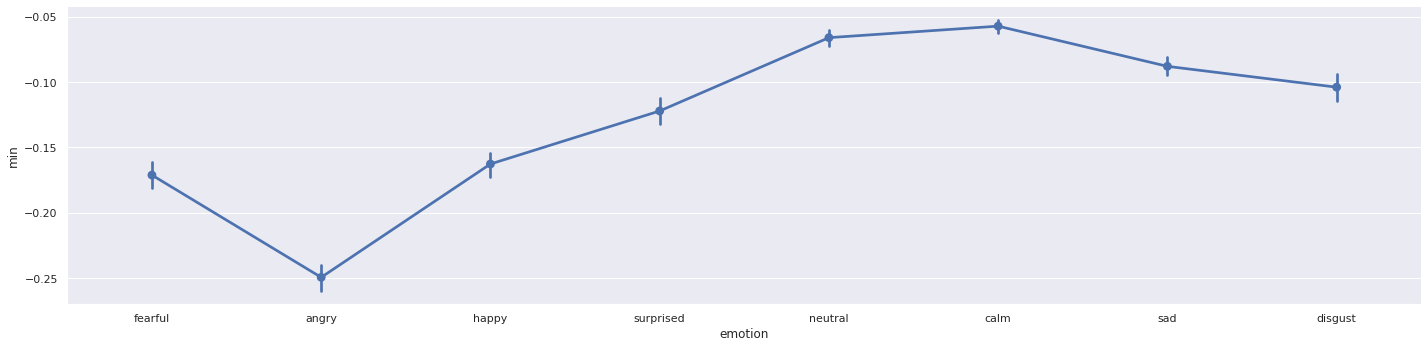

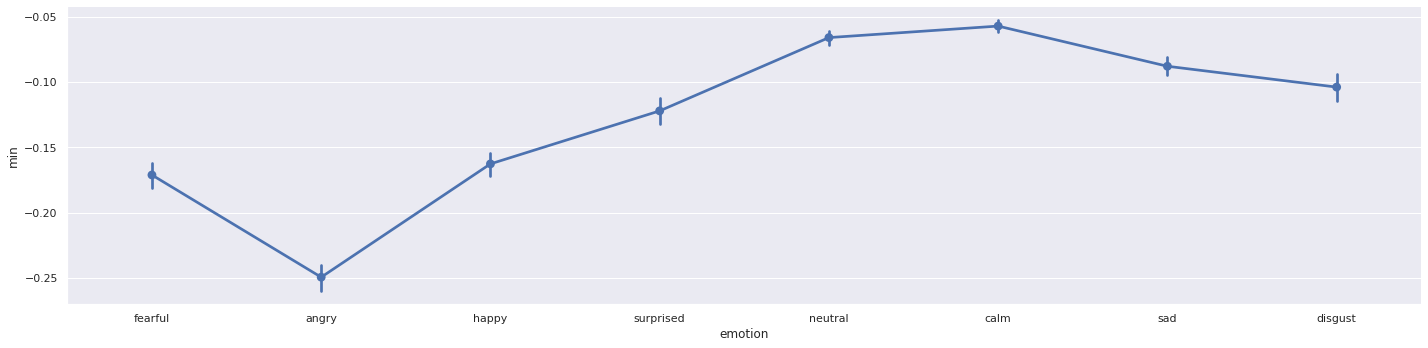

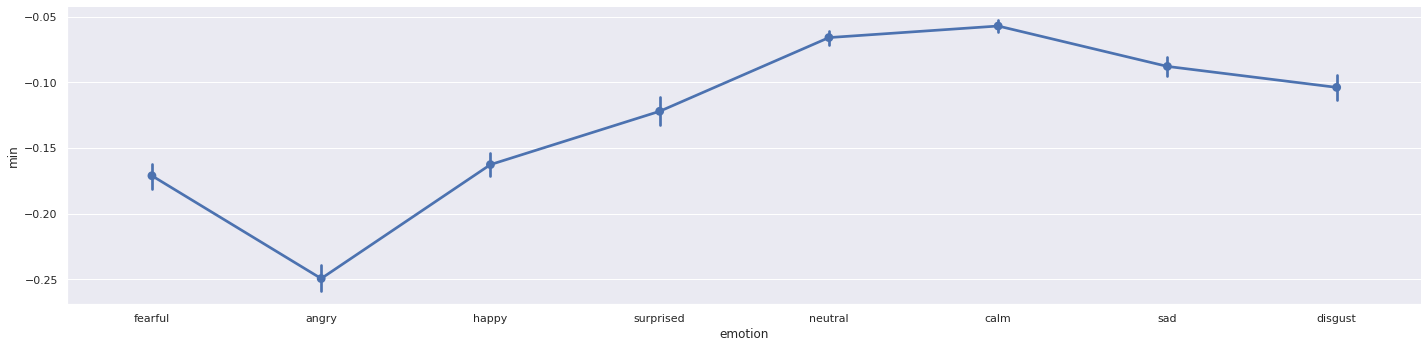

skew


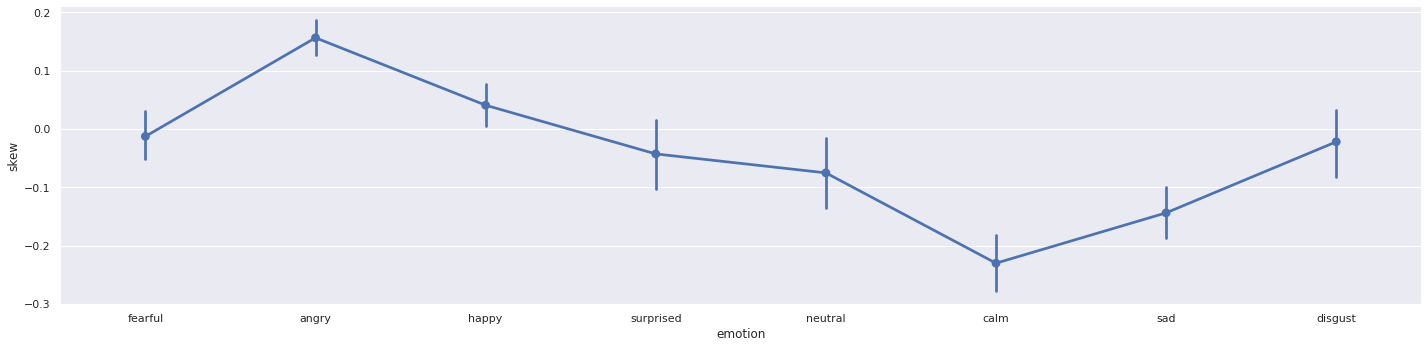

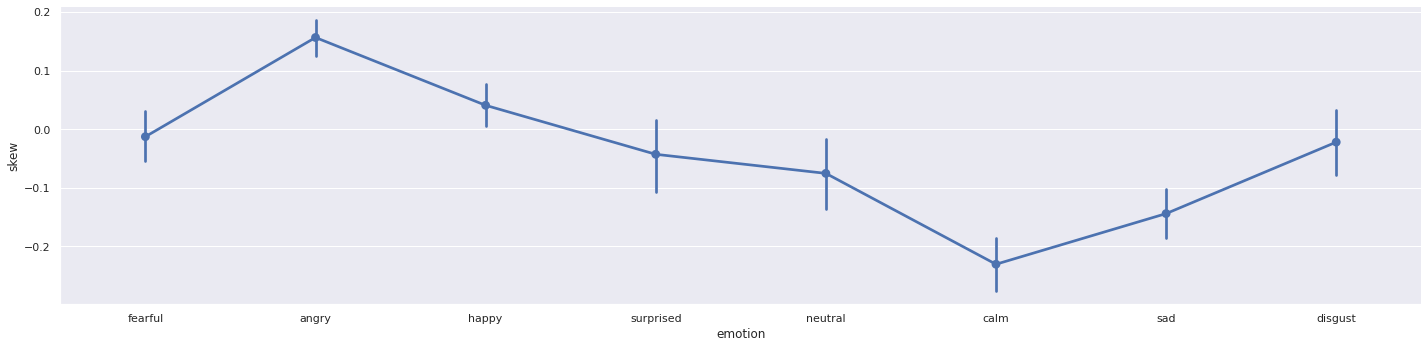

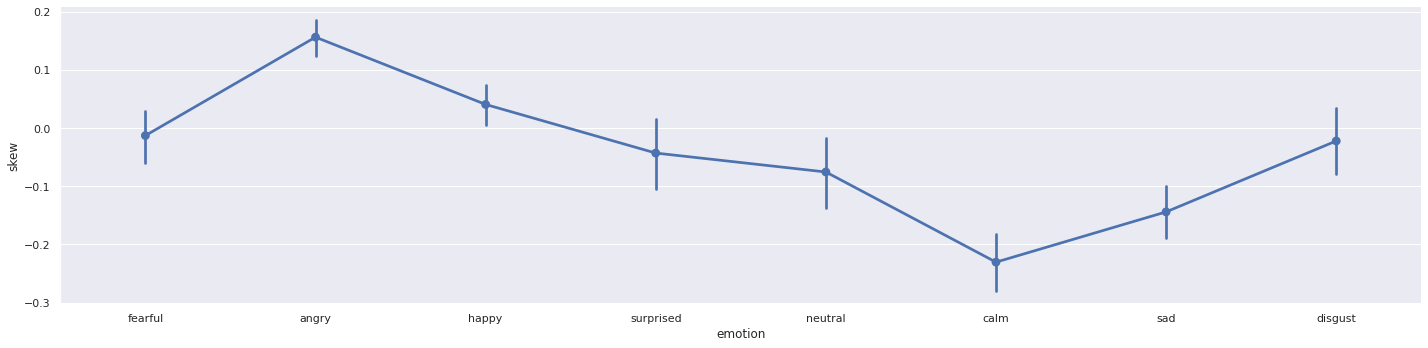

std


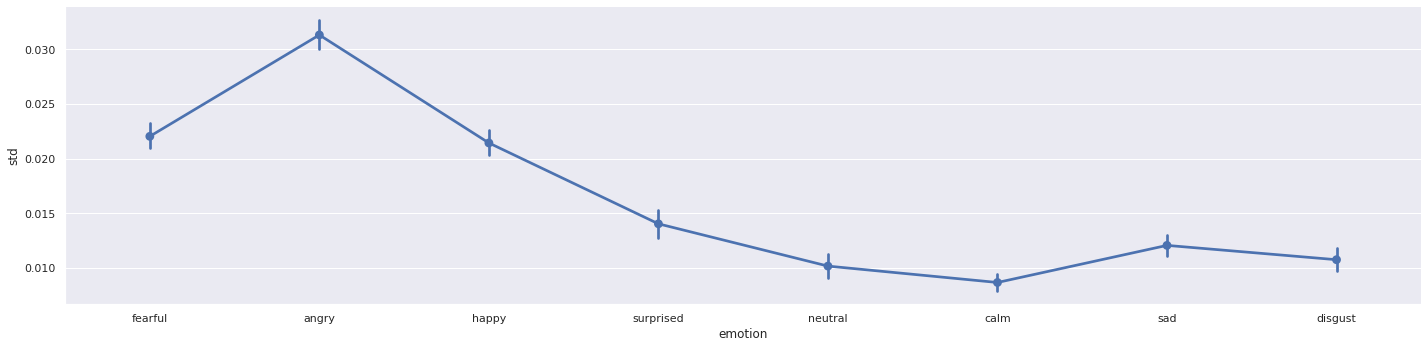

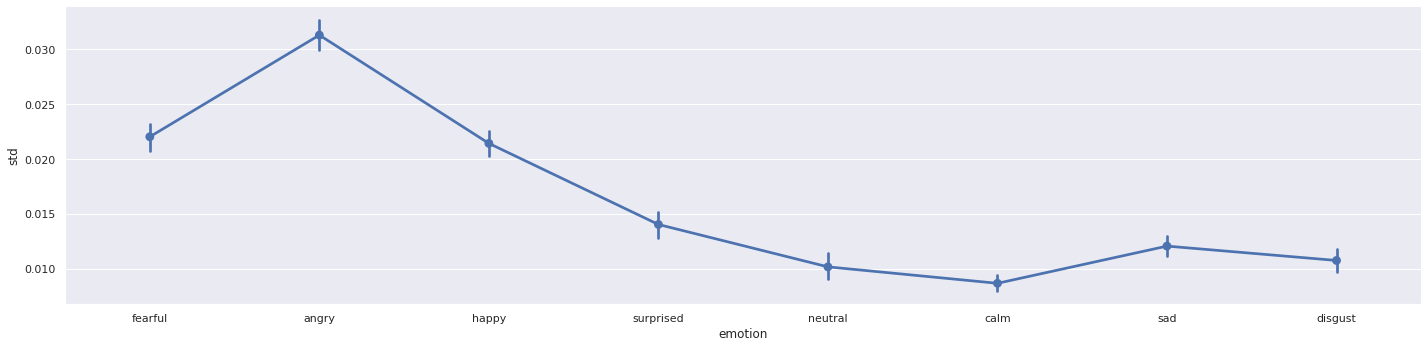

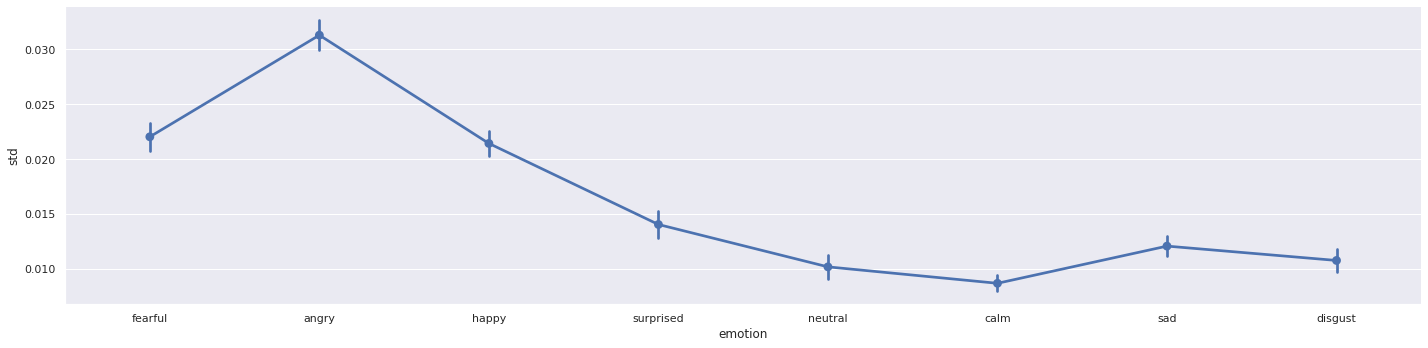

kur


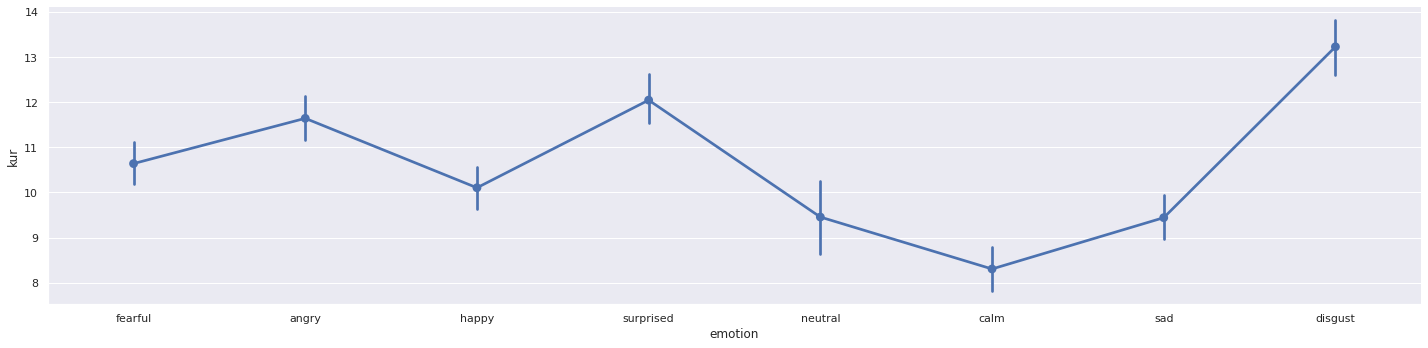

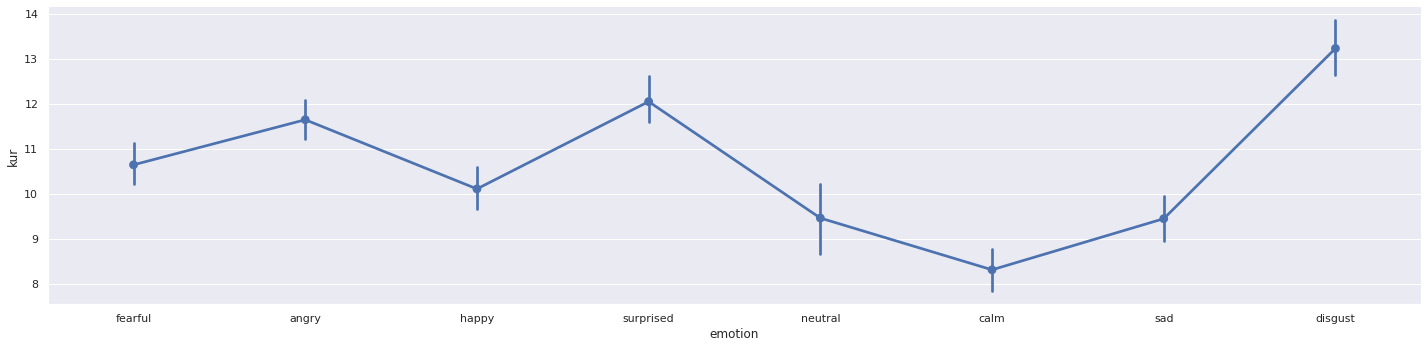

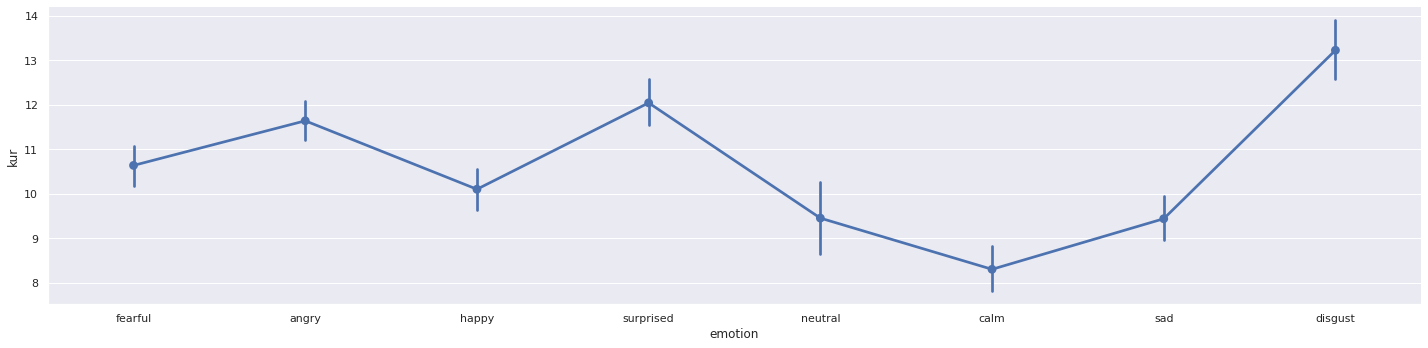

length_ms


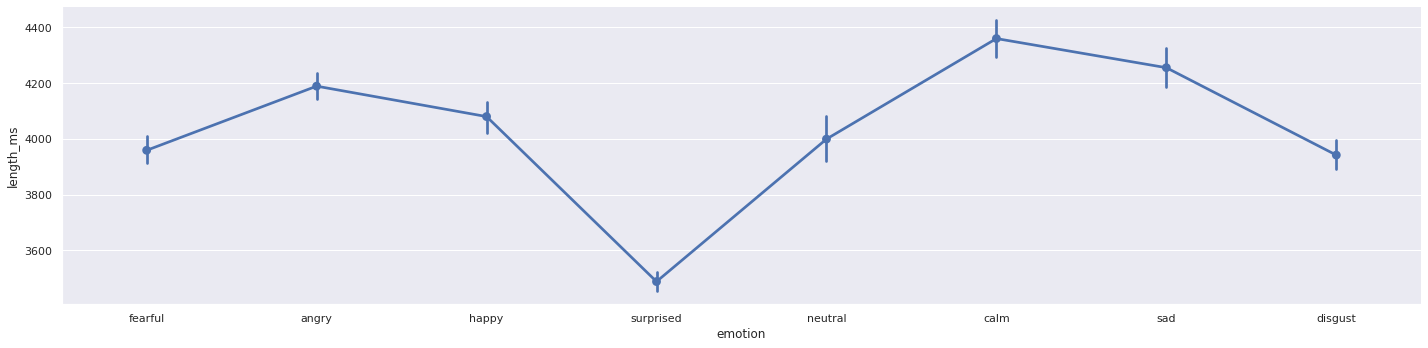

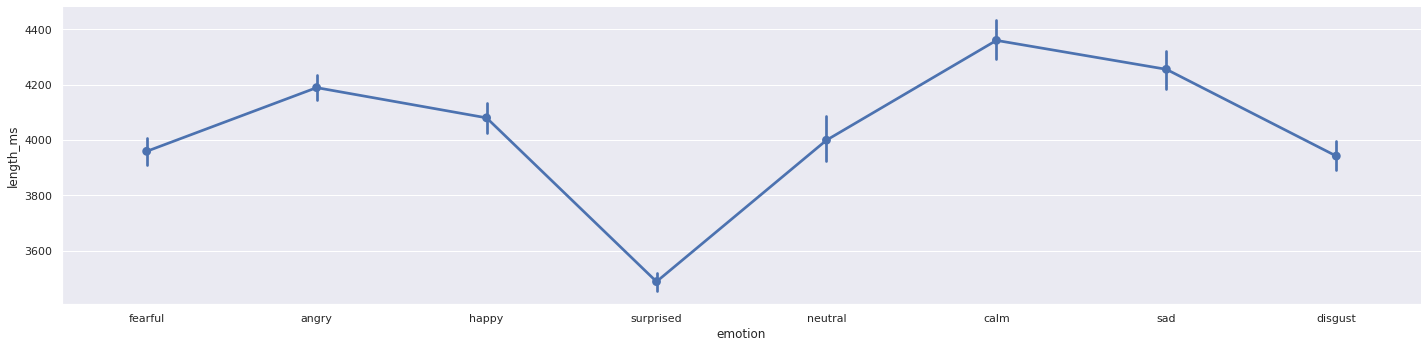

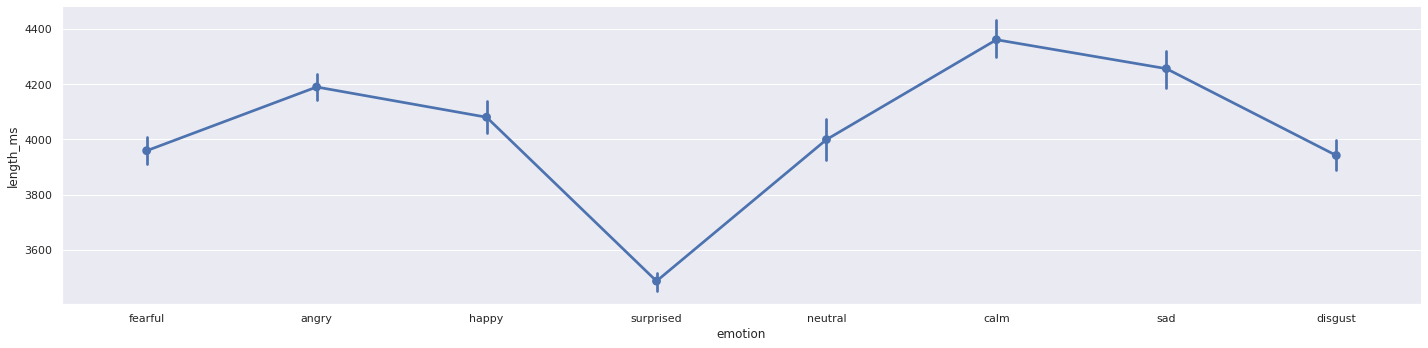

In [ ]:
sns.set_theme()
for col_data in cols_data:
  print(col_data)
  for col_cat in cols_cat:
    sns.catplot(
      data=df, x="emotion", y=col_data,
      kind="point", aspect=4
    )
    plt.show()

In [ ]:
# df_data.corr()[0.5 < df_data.corr() < 1].all()
#df_data_v2 = df_data[["mfcc_mean", "sc_mean", "stft_mean", "zero_crossings_sum", "intensity", "length_ms", "mean"]]
# df_data_v2 = df_data[["mean", "max", "min", "skew", "std", "kur", "intensity", "length_ms"]]
# df_data_v2.corr()[(df_data_v2.corr() < 1.0) & ((df_data_v2.corr() > 0.4) | (df_data_v2.corr() < -0.4))]


In [ ]:
df_data.corr()[(df_data.corr() < 1.0) & ((df_data.corr() > 0.4) | (df_data.corr() < -0.4))]


,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
length_ms,NaN,0.997121,NaN,NaN,NaN,NaN,NaN,NaN,-0.543208,NaN,...,0.406411,NaN,NaN,0.595727,NaN,NaN,NaN,NaN,-0.513398,NaN
frame_count,0.997121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.541448,NaN,...,0.405579,NaN,NaN,0.593170,NaN,NaN,NaN,NaN,-0.511293,NaN
intensity,NaN,NaN,NaN,0.442439,0.580667,-0.924508,0.914901,NaN,NaN,-0.424719,...,NaN,NaN,NaN,NaN,NaN,0.859143,-0.829389,0.830872,NaN,NaN
zero_crossings_sum,NaN,NaN,0.442439,NaN,NaN,-0.546238,0.485773,-0.445349,NaN,NaN,...,NaN,NaN,NaN,0.450124,NaN,0.454161,-0.415477,0.412657,NaN,NaN
mfcc_mean,NaN,NaN,0.580667,NaN,NaN,-0.620080,0.606989,NaN,NaN,-0.593395,...,NaN,0.400143,NaN,NaN,NaN,0.582122,-0.614523,0.600911,NaN,NaN
mfcc_std,NaN,NaN,-0.924508,-0.546238,-0.620080,NaN,-0.976098,0.438390,NaN,0.524719,...,NaN,NaN,NaN,-0.411363,NaN,-0.897427,0.866443,-0.863714,NaN,NaN
mfcc_min,NaN,NaN,0.914901,0.485773,0.606989,-0.976098,NaN,NaN,NaN,-0.453582,...,NaN,NaN,NaN,NaN,NaN,0.885457,-0.870957,0.870579,NaN,NaN
mfcc_max,NaN,NaN,NaN,-0.445349,NaN,0.438390,NaN,NaN,NaN,NaN,...,-0.500291,NaN,NaN,-0.524378,NaN,-0.401862,NaN,NaN,NaN,NaN
sc_mean,-0.543208,-0.541448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.529673,...,NaN,NaN,NaN,-0.631851,NaN,NaN,NaN,NaN,NaN,NaN
sc_std,NaN,NaN,-0.424719,NaN,-0.593395,0.524719,-0.453582,NaN,0.529673,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.451793,0.451064,-0.428564,NaN,NaN


**Correlazioni importanti**

FRAME_COUNT
* FRAME_COUNT —> SC_MEAN, SC_SKEW, STFT_MEAN, STFT_SKEW

INTENSITY
* INTENSITY —> ZERO_CROSSINGS_SUM, MFCC_MEAN, MFCC_STD, MFCC_MIN, STD, MIN, MAX

ZERO_CROSSINGS_SUM
* ZERO_CROSSING_SUM —>  MFCC_STD, MFCC_MIN, STD, MFCC_MAX, MIN, MAX

MFCC
* MFCC_MEAN —> MFCC_STD, MFCC_MIN, SC_STD, SC_MIN, STD, MIN, MAX
* MFCC_STD —> MFCC_MIN, MFCC_MAX, SC_STD, SC_KUR, SC_SKEW, STFT_SKEW, STD, MIN, MAX
* MFCC_MIN —> SC_STD, STD, MIN, MAX
* MFCC_MAX —> STFT_MEAN, STFT_STD, STFT_SKEW, MAX

SC
* SC_MEAN —>  SC_STD, SC_MAX, SC_KUR, SC_SKEW, STFT_MEAN, STFT_SKEW
* SC_STD —> SC_MIN, SC_MAX, SC_KUR, SC_SKEW, STD, MIN, MAX
* SC_MIN —> STFT_STD
* SC_KUR —> SC_SKEW, STFT_SKEW
* SC_SKEW —> STFT_MEAN, STFT_SKEW

STFT
* STFT_MEAN —> STFT_STD, STFT_MIN, STFT-SKEW, KUR
* STFT_STD —> STFT_MIN, STFT_KUR, STFT_SKEW, KUR
* STFT_MIN —> STFT_SKEW

STD
* STD —> MIN, MAX

In [ ]:
df_data.corr().abs().mean()
#media dei valori assoluti (tenendo conto che ci sono correlazioni negative)
#df_data.corr().abs().mean().max()
#stampo il valore massimo

length_ms             0.322932
frame_count           0.322603
intensity             0.431145
zero_crossings_sum    0.307368
mfcc_mean             0.345737
mfcc_std              0.464272
mfcc_min              0.429470
mfcc_max              0.315585
sc_mean               0.346823
sc_std                0.355523
sc_min                0.211371
sc_max                0.187112
sc_kur                0.332409
sc_skew               0.379034
stft_mean             0.392158
stft_std              0.321304
stft_min              0.170320
stft_kur              0.129913
stft_skew             0.394399
mean                  0.126681
std                   0.421974
min                   0.395654
max                   0.395161
kur                   0.213070
skew                  0.208709
dtype: float64

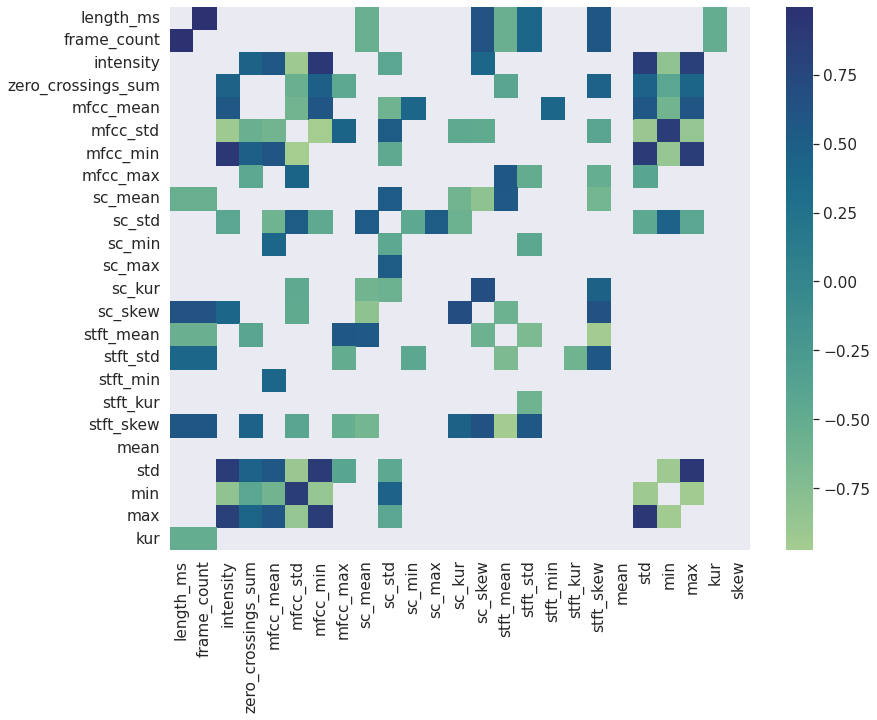

In [ ]:
df_datacorr = df_data.corr()[(df_data.corr() < 1.0) & ((df_data.corr() > 0.4) | (df_data.corr() < -0.4))]
sns.set(rc={'figure.figsize':(13, 10)})
sns.set(font_scale=1.4)
sns.heatmap(df_datacorr[:-1], cmap="crest") #Remove last element (not correlated)
plt.show()

In [ ]:
cols_general = ["mean", "std", "min", "max", "kur", "skew"]

cols_groups = [
    ["frame_count", "intensity", "zero_crossings_sum"],
    ["mfcc_mean", "mfcc_std", "mfcc_min", "mfcc_max"],
    ["sc_mean", "sc_std", "sc_min", "sc_max", "sc_kur", "sc_skew"],
    ["stft_mean", "stft_std", "stft_min", "stft_kur", "stft_skew"]
]

In [ ]:
for cols_group in cols_groups:
  print(cols_group)
  sns.pairplot(df, 
               height=2.5, 
               x_vars=cols_group, 
               y_vars=cols_general)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sns.pairplot(df, height=2.5, x_vars=cols_data, y_vars=cols_data, kind="reg")

In [ ]:
def column_transformer(col):
  return col.apply(lambda x: (x - col.median()) / stats.median_abs_deviation(col))

df_data = df_data.apply(lambda x: column_transformer(x))

# Pandas main functions

## Access elements

### Access columns

In [ ]:
# access columns (obtaining a series)
df["modality"]
df.loc[:, "modality"]
df.iloc[:, 0]

In [ ]:
# access columns (but obtaining a dataframe)
df[["modality"]]

In [ ]:
# access multiple columns
df[["modality", "vocal_channel"]]

### Access rows

In [ ]:
# access rows (obtaining a series)
df.iloc[0, :]
df.iloc[0]

### Access elements

In [ ]:
# access elements
df["modality"][0]
df.iloc[0]["modality"]

In [ ]:
# get dataframe columns
df.columns

In [ ]:
# get dataframe index
df.index

In [ ]:
# rename a columns
df.rename(columns={"modality": "modalità"}) 
# ATTENZIONE: non modifica il dataframe originale

In [ ]:
# dataframe trasposto (capovolto)
df.T

## Modifying dataframes

In [ ]:
# creating a copy of the dataframe
df_copy = df.copy()

In [ ]:
# add columns
df_copy["new column"] = list(range(len(df)))
df_copy

In [ ]:
# add rows
df_copy.loc[len(df_copy)] = list(range(len(df_copy.columns)))
df_copy

In [ ]:
# replace original dataset with modified dataset
df = df_copy

## Converting between data structures

In [ ]:
# getting all the values of the df (as a numpy array)
df.values

In [ ]:
# convert this numpy array to a simple list
df.values.tolist()

### Filtering

In [ ]:
# filtering rows basing on a single column
df[df["emotion"] == "angry"]

In [ ]:
# filtering rows basing on multiple columns (get all rows with at least one of these conditions)
df[(df["emotion"] == "angry") | (df["vocal_channel"] == "song")]

In [ ]:
# filtering rows basing on multiple columns (get all rows with all these condition)
df[(df["emotion"] == "angry") & (df["vocal_channel"] == "song")]

## Apply vs iterating

In [ ]:
# apply square function to an entire column
df.loc[:, "std"].apply(np.sqrt)

In [ ]:
# deleting columns
df.drop(["modality"], axis=1)

In [ ]:
# deleting rows
df.drop(range(0,5), axis=0)

In [ ]:
df.apply(lambda x: [1, 2], axis=1)

In [ ]:
df.apply(lambda a: [str(i) + " ciao" for i in a])

## Aggregation

In [ ]:
# math of a column
df['std'].median()
df['std'].mean()

In [ ]:
df.groupby(['emotion']).mean()

In [ ]:

df.groupby(['emotion']).agg([np.mean, np.median])